# Generate Model Card

#### DataSet: Women in Data Science, 91,713 encounters 
#### Microskill: Generate a Model Card
#### Date: 2025-02-01
#### Author: Jeremy Balch

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tableone import TableOne
import warnings
warnings.filterwarnings("ignore")


### Load Train Data

In [3]:
data = pd.read_csv('/Users/jeremy/Desktop/ISICEM/widsdatathon2020/data_clean.csv')
# data = pd.read_csv('../training_v2.csv')

from sklearn.model_selection import train_test_split

# Define your features and target variable
X = data.drop('hospital_death', axis=1)  # Features
y = data['hospital_death']               # Target variable

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



,Unnamed: 0,patient_id,age,elective_surgery,bmi,apache_4a_hospital_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,...,age_cat_70-79,age_cat_80-89,bmi_cat_10-14,bmi_cat_15-19,bmi_cat_20-24,bmi_cat_25-29,bmi_cat_30-34,bmi_cat_35-39,bmi_cat_40-44,bmi_cat_>45
0,0,25312,68.0,0,22.73,0.10,0.0,0.0,1.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1,1,59342,77.0,0,27.42,0.47,0.0,0.0,1.0,0.0,...,True,False,False,False,False,True,False,False,False,False
2,2,50777,25.0,0,31.95,0.00,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
3,3,46918,81.0,1,22.64,0.04,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,False,False,False
4,5,74489,67.0,0,27.56,0.05,0.0,0.0,1.0,0.0,...,False,False,False,False,False,True,False,False,False,False


## Build Figures for Model Card

This code builds figures for the model card including: distributions of gender, ethnicity, age, and BMI in the training and testing data; auroc by gender, ethnicity, age, and bmi; and disparate impact and equalized odds by ethnicity. It stores the images separately in the figures folder to be used in building the html formatted model card.

### Distributions of Gender, Ethnicity, Age, and BMI

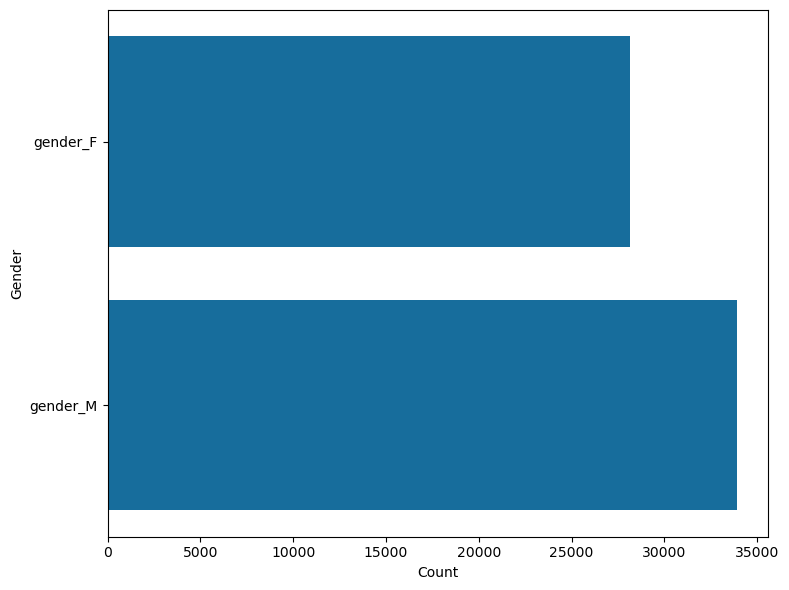

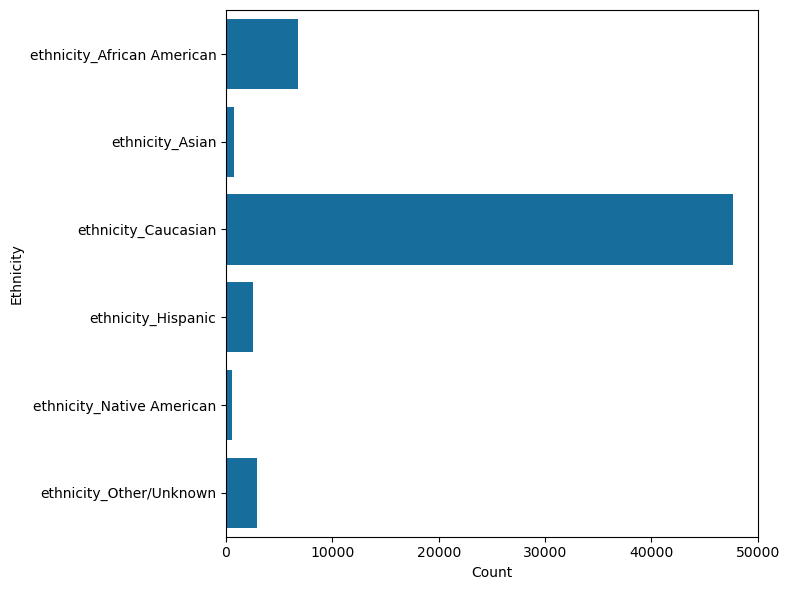

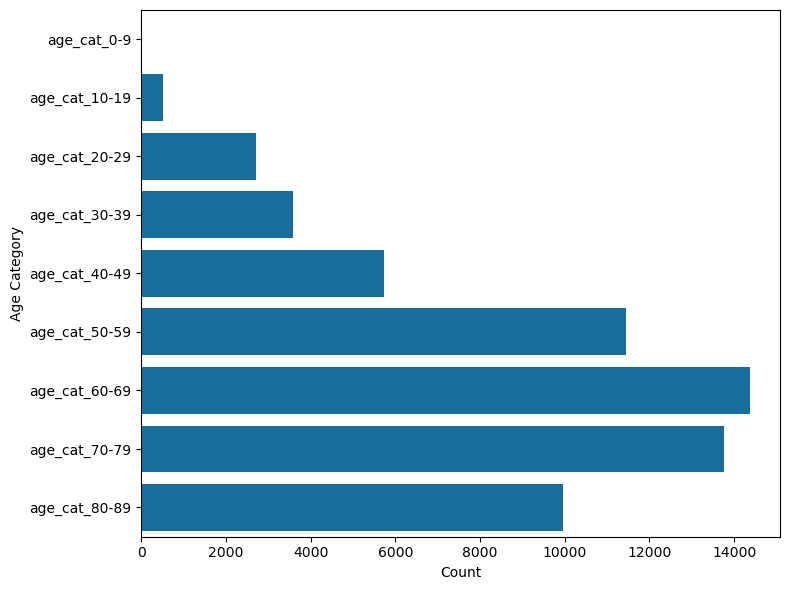

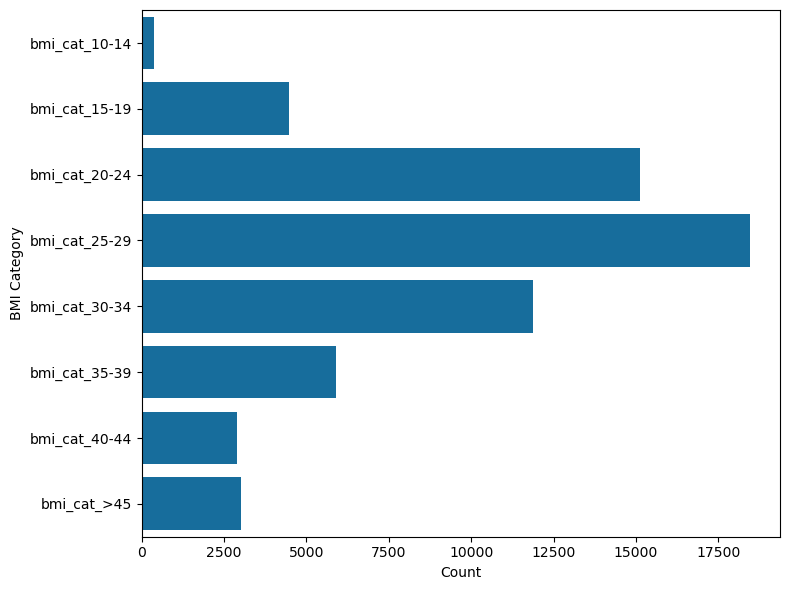

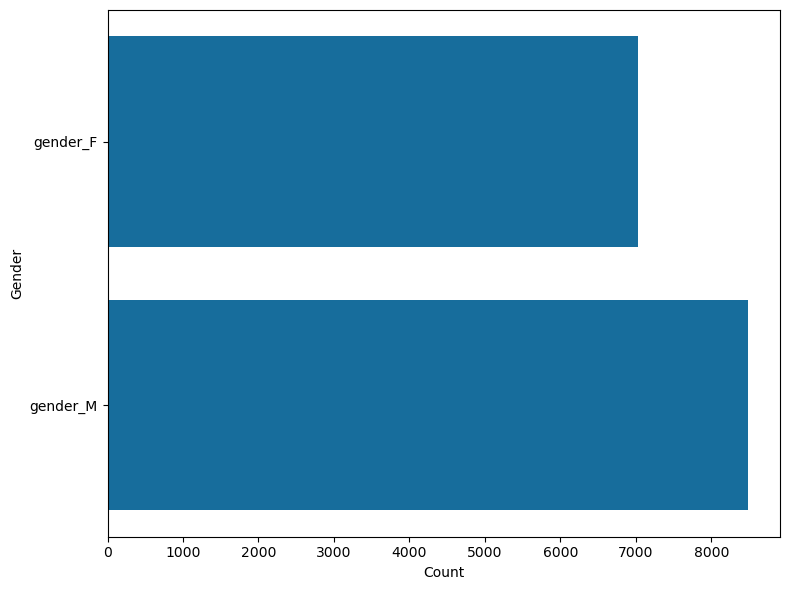

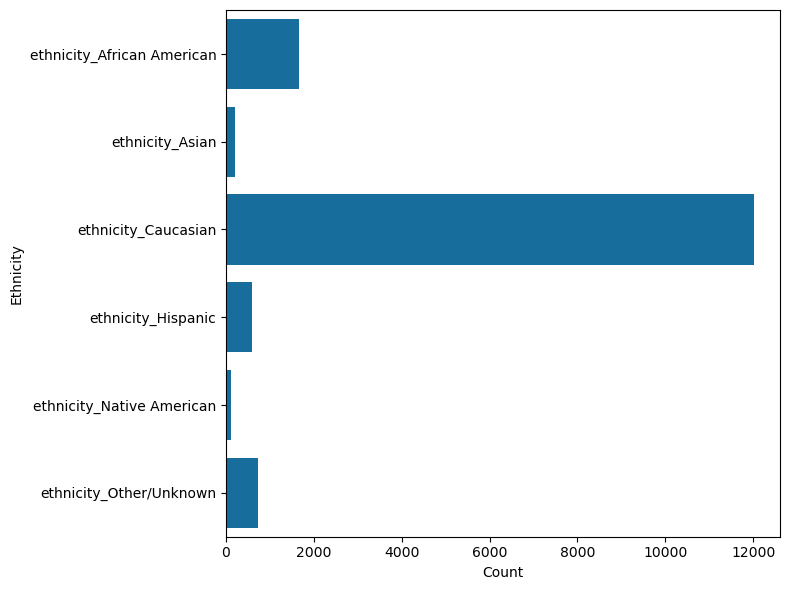

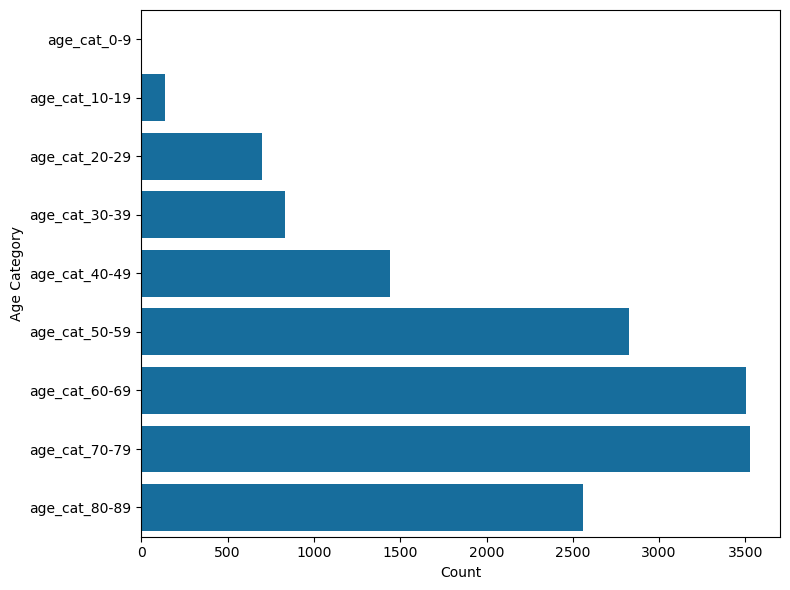

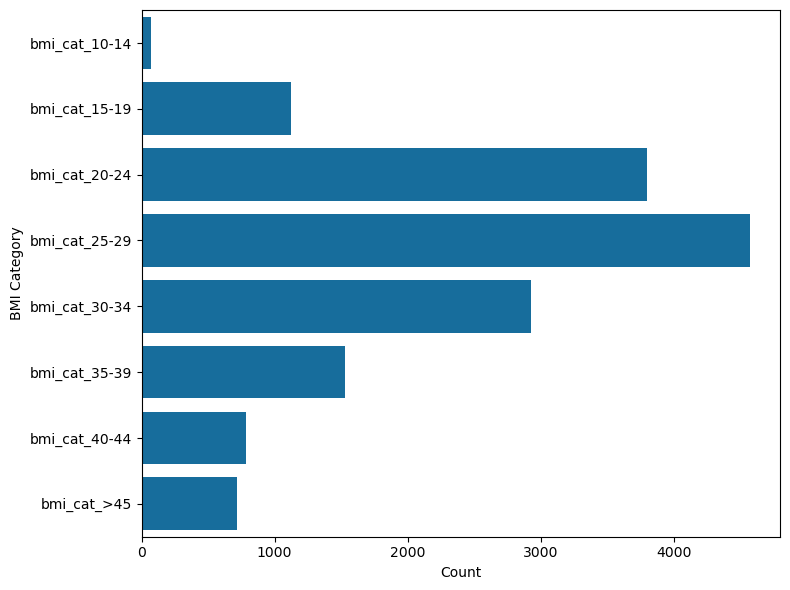

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example category groupings (adjust if needed)
gender_cols = ['gender_F', 'gender_M']
ethnicity_cols = [
    'ethnicity_African American',
    'ethnicity_Asian',
    'ethnicity_Caucasian',
    'ethnicity_Hispanic',
    'ethnicity_Native American',
    'ethnicity_Other/Unknown'
]
age_cols = [
    'age_cat_0-9',
    'age_cat_10-19',
    'age_cat_20-29',
    'age_cat_30-39',
    'age_cat_40-49',
    'age_cat_50-59',
    'age_cat_60-69',
    'age_cat_70-79',
    'age_cat_80-89'
]
bmi_cols = [
    'bmi_cat_10-14',
    'bmi_cat_15-19',
    'bmi_cat_20-24',
    'bmi_cat_25-29',
    'bmi_cat_30-34',
    'bmi_cat_35-39',
    'bmi_cat_40-44',
    'bmi_cat_>45'
]

save_dir = "/Users/jeremy/UFL Dropbox/Jeremy Balch/GitHub/UF-biasathon-workshop2025/figures"

# ------------------ TRAINING DATA ------------------
# 1) Training: Gender distribution (horizontal bar chart)
train_gender_counts = X_train[gender_cols].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=train_gender_counts.values, y=train_gender_counts.index, orient='h')
plt.xlabel("Count")
plt.ylabel("Gender")
plt.tight_layout()
plt.savefig(f"{save_dir}/train_gender_distribution.png")
plt.show()

# 2) Training: Ethnicity distribution (horizontal bar chart)
train_ethnicity_counts = X_train[ethnicity_cols].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=train_ethnicity_counts.values, y=train_ethnicity_counts.index, orient='h')
plt.xlabel("Count")
plt.ylabel("Ethnicity")
plt.tight_layout()
plt.savefig(f"{save_dir}/train_ethnicity_distribution.png")
plt.show()

# 3) Training: Age category distribution (horizontal bar chart)
train_age_counts = X_train[age_cols].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=train_age_counts.values, y=train_age_counts.index, orient='h')
plt.xlabel("Count")
plt.ylabel("Age Category")
plt.tight_layout()
plt.savefig(f"{save_dir}/train_age_category_distribution.png")
plt.show()

# 4) Training: BMI category distribution (horizontal bar chart)
train_bmi_counts = X_train[bmi_cols].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=train_bmi_counts.values, y=train_bmi_counts.index, orient='h')
plt.xlabel("Count")
plt.ylabel("BMI Category")
plt.tight_layout()
plt.savefig(f"{save_dir}/train_bmi_category_distribution.png")
plt.show()

# ------------------ TESTING DATA ------------------
# 5) Testing: Gender distribution (horizontal bar chart)
test_gender_counts = X_test[gender_cols].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=test_gender_counts.values, y=test_gender_counts.index, orient='h')
plt.xlabel("Count")
plt.ylabel("Gender")
plt.tight_layout()
plt.savefig(f"{save_dir}/test_gender_distribution.png")
plt.show()

# 6) Testing: Ethnicity distribution (horizontal bar chart)
test_ethnicity_counts = X_test[ethnicity_cols].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=test_ethnicity_counts.values, y=test_ethnicity_counts.index, orient='h')
plt.xlabel("Count")
plt.ylabel("Ethnicity")
plt.tight_layout()
plt.savefig(f"{save_dir}/test_ethnicity_distribution.png")
plt.show()

# 7) Testing: Age category distribution (horizontal bar chart)
test_age_counts = X_test[age_cols].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=test_age_counts.values, y=test_age_counts.index, orient='h')
plt.xlabel("Count")
plt.ylabel("Age Category")
plt.tight_layout()
plt.savefig(f"{save_dir}/test_age_category_distribution.png")
plt.show()

# 8) Testing: BMI category distribution (horizontal bar chart)
test_bmi_counts = X_test[bmi_cols].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=test_bmi_counts.values, y=test_bmi_counts.index, orient='h')
plt.xlabel("Count")
plt.ylabel("BMI Category")
plt.tight_layout()
plt.savefig(f"{save_dir}/test_bmi_category_distribution.png")
plt.show()

### AUROC by Gender, Ethnicity, Age, and BMI

Accuracy: 0.92
AUROC: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     14214
           1       0.58      0.20      0.30      1301

    accuracy                           0.92     15515
   macro avg       0.76      0.60      0.63     15515
weighted avg       0.90      0.92      0.90     15515

Confusion Matrix:
[[14024   190]
 [ 1035   266]]
AUROC by Ethnicity: {'ethnicity_African American': 0.8671951651241593, 'ethnicity_Asian': 0.825, 'ethnicity_Caucasian': 0.8365831817585664, 'ethnicity_Hispanic': 0.8631198709405906, 'ethnicity_Native American': 0.9212264150943397}
AUROC by Gender: {'Female': 0.833848704814433, 'Male': 0.8467074626782979}
AUROC by Age: {'age_cat_10-19': 0.8609022556390977, 'age_cat_20-29': 0.8731905465288036, 'age_cat_30-39': 0.9083438023450585, 'age_cat_40-49': 0.8681540778314972, 'age_cat_50-59': 0.8667927754872564, 'age_cat_60-69': 0.8303315773163928, 'age_cat_70-79': 0.813116883116

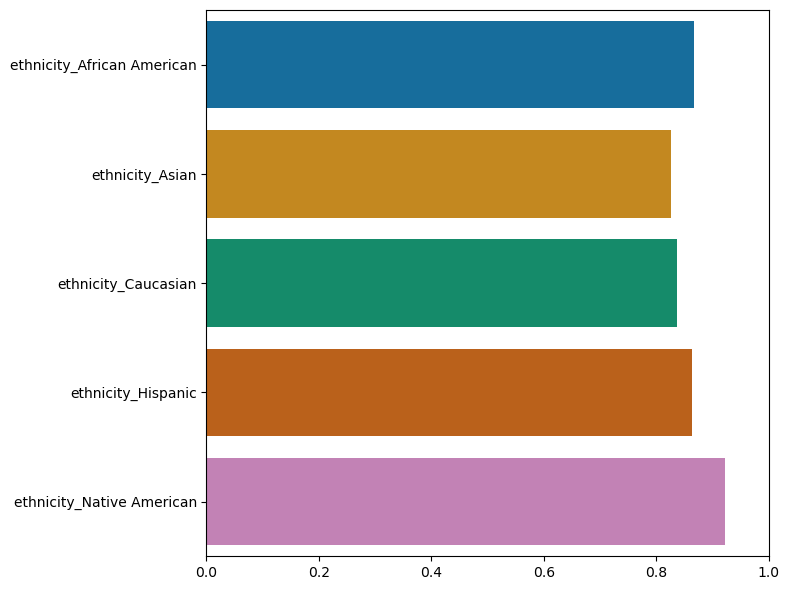

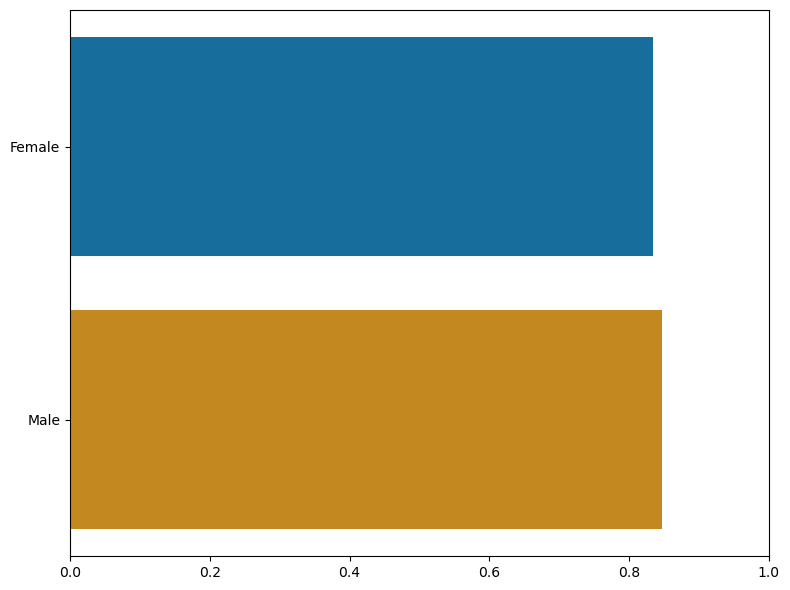

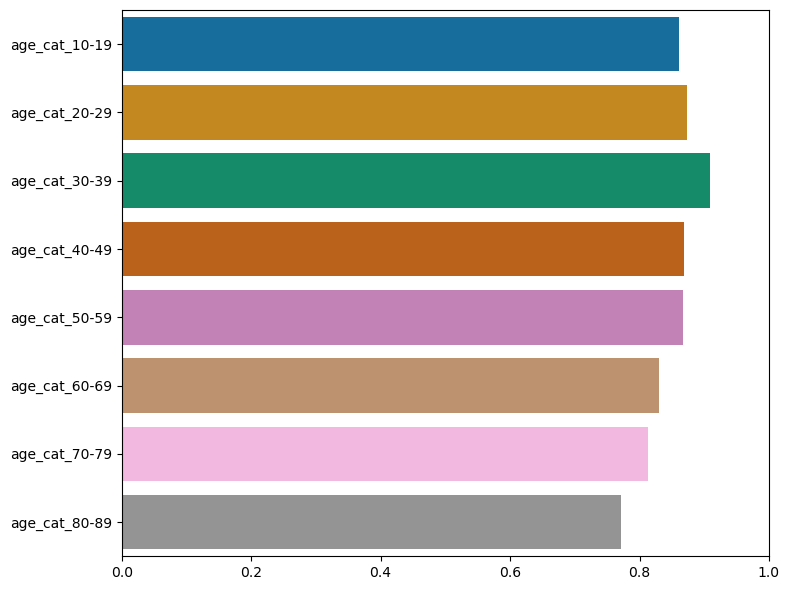

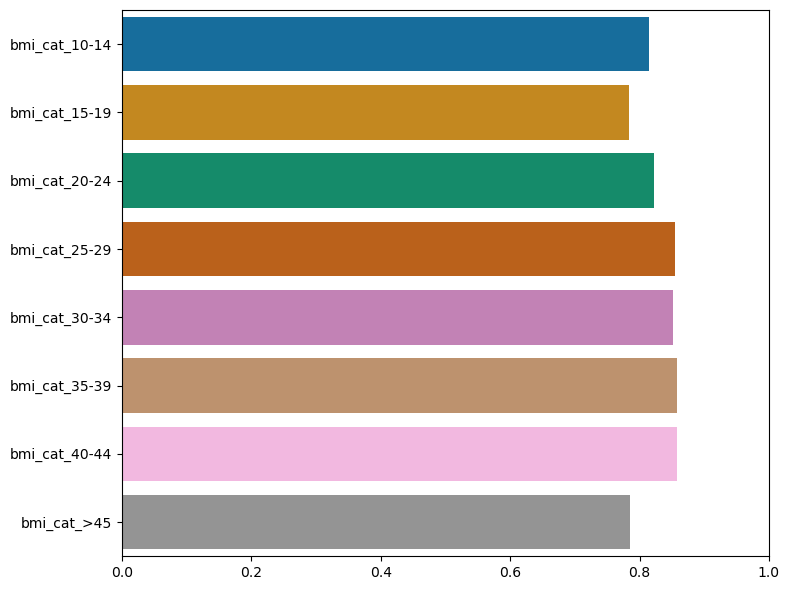

In [45]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate AUROC
from sklearn.metrics import roc_auc_score
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
auroc = roc_auc_score(y_test, y_pred_proba)
print(f"AUROC: {auroc:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



# Use the colorblind color palette
sns.set_palette("colorblind")

# Same helper function for ethnicity / age / BMI
def calculate_auroc_by_group(data, group_columns, model, X_test, y_test):
    auroc_scores_else = {}
    for group_column in group_columns:
        # Filter the test set for the current group
        group_indices = (X_test[group_column] == 1)
        X_group = X_test[group_indices]
        y_group = y_test[group_indices]
        
        # Calculate AUROC if the group has enough samples
        if len(y_group) > 0:
            y_pred_proba_group = model.predict_proba(X_group)[:, 1]
            auroc_scores_else[group_column] = roc_auc_score(y_group, y_pred_proba_group)
    
    return auroc_scores_else

# Helper function for a single gender column (by default "gender_F")
def calculate_auroc_for_gender(model, X_test, y_test, gender_column='gender_F'):
    auroc_scores_by_gender = {}

    # Females
    female_indices = (X_test[gender_column] == 1)
    X_female = X_test[female_indices]
    y_female = y_test[female_indices]
    if len(y_female) > 0:
        y_pred_proba_female = model.predict_proba(X_female)[:, 1]
        auroc_scores_by_gender['Female'] = roc_auc_score(y_female, y_pred_proba_female)

    # Males
    male_indices = (X_test[gender_column] == 0)
    X_male = X_test[male_indices]
    y_male = y_test[female_indices == False]  # or simply y_test[male_indices]
    if len(y_male) > 0:
        y_pred_proba_male = model.predict_proba(X_male)[:, 1]
        auroc_scores_by_gender['Male'] = roc_auc_score(y_male, y_pred_proba_male)

    return auroc_scores_by_gender

# Example subgroup columns
ethnicity_columns = [
    'ethnicity_African American',
    'ethnicity_Asian',
    'ethnicity_Caucasian',
    'ethnicity_Hispanic',
    'ethnicity_Native American'
]

age_columns = [
    'age_cat_10-19', 'age_cat_20-29', 'age_cat_30-39',
    'age_cat_40-49', 'age_cat_50-59', 'age_cat_60-69',
    'age_cat_70-79', 'age_cat_80-89'
]

bmi_columns = [
    'bmi_cat_10-14', 'bmi_cat_15-19', 'bmi_cat_20-24', 'bmi_cat_25-29',
    'bmi_cat_30-34', 'bmi_cat_35-39', 'bmi_cat_40-44', 'bmi_cat_>45'
]

data['gender_M'] = 1 - data['gender_F']  # only if "gender_F" exists!

# Now calculate AUROC for each subgroup
auroc_by_ethnicity = calculate_auroc_by_group(
    data, ethnicity_columns, rf_model, X_test, y_test
)

# For gender, we have a simpler specialized function:
auroc_by_gender = calculate_auroc_for_gender(
    rf_model, X_test, y_test, gender_column='gender_F'
)

auroc_by_age = calculate_auroc_by_group(
    data, age_columns, rf_model, X_test, y_test
)

auroc_by_bmi = calculate_auroc_by_group(
    data, bmi_columns, rf_model, X_test, y_test
)

print("AUROC by Ethnicity:", auroc_by_ethnicity)
print("AUROC by Gender:", auroc_by_gender)
print("AUROC by Age:", auroc_by_age)
print("AUROC by BMI:", auroc_by_bmi)

# Save directory for plots
save_dir = "/Users/jeremy/UFL Dropbox/Jeremy Balch/GitHub/UF-biasathon-workshop2025/figures"

# Plot each category separately with horizontal orientation

# 1) Ethnicity
plt.figure(figsize=(8, 6))
sns.barplot(
    x=list(auroc_by_ethnicity.values()),
    y=list(auroc_by_ethnicity.keys()),
    palette="colorblind",
    orient='h'
)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{save_dir}/auroc_by_ethnicity.png")
plt.show()

# 2) Gender
plt.figure(figsize=(8, 6))
sns.barplot(
    x=list(auroc_by_gender.values()),
    y=list(auroc_by_gender.keys()),
    palette="colorblind",
    orient='h'
)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{save_dir}/auroc_by_gender.png")
plt.show()

# 3) Age
plt.figure(figsize=(8, 6))
sns.barplot(
    x=list(auroc_by_age.values()),
    y=list(auroc_by_age.keys()),
    palette="colorblind",
    orient='h'
)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{save_dir}/auroc_by_age.png")
plt.show()

# 4) BMI
plt.figure(figsize=(8, 6))
sns.barplot(
    x=list(auroc_by_bmi.values()),
    y=list(auroc_by_bmi.keys()),
    palette="colorblind",
    orient='h'
)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{save_dir}/auroc_by_bmi.png")
plt.show()

### Disparate Impact and Equalized Odds by Ethnicity

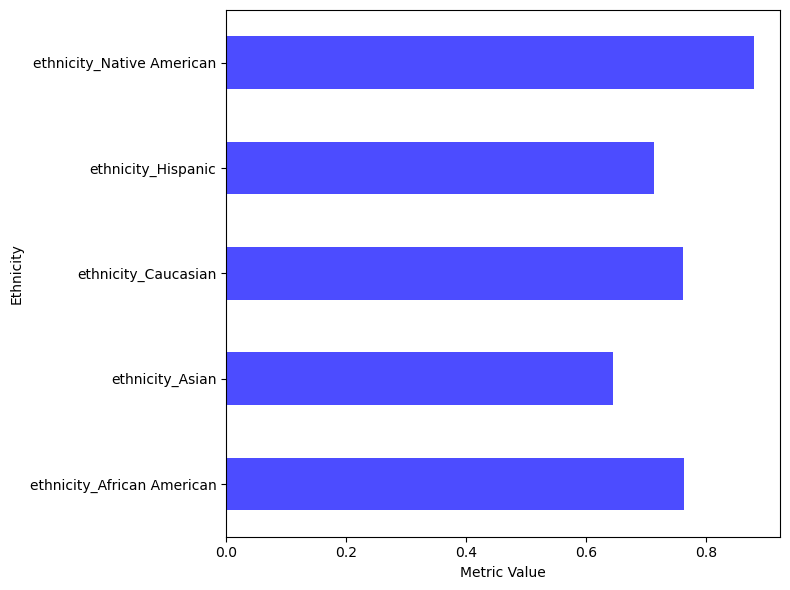

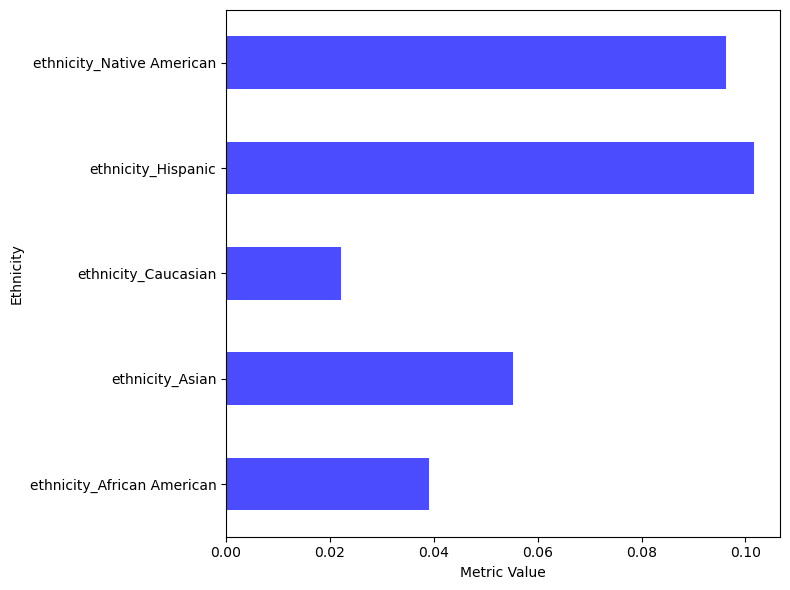

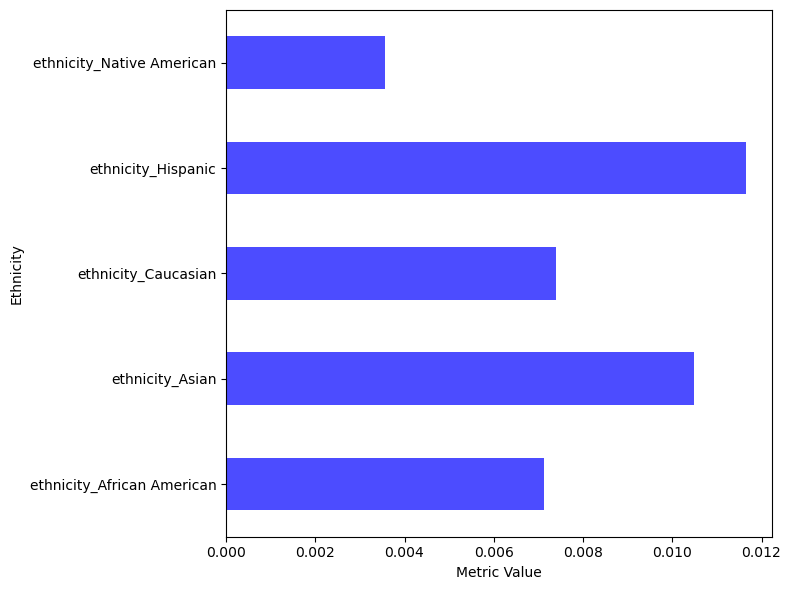

In [46]:
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Suppose these are your original DataFrame and model predictions
data = data.copy()

# Drop unnecessary columns
# data = data.drop(columns=['gender_M', 'ethnicity_Other/Unknown'])

# Define features and target
X = data.drop(columns=['hospital_death'])
y = data['hospital_death']

# Split data first (before upsampling)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Single model prediction
y_pred = rf_model.predict(X_test)

# List of ethnic groups to analyze
ethnicity_columns = [
    'ethnicity_African American',
    'ethnicity_Asian',
    'ethnicity_Caucasian',
    'ethnicity_Hispanic',
    'ethnicity_Native American'
]

def disparate_impact(y_true, y_pred, sensitive_feature):
    """Computes selection-rate difference between groups."""
    df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred, 'group': X_test[sensitive_feature]})
    rates = df.groupby('group')['y_pred'].mean()
    
    di = rates.min() / rates.max() if rates.max() > 0 else 0
    return di if di >= 0.1 else 1/di

def compute_bias_metrics(y_test, y_pred, ethnicity_columns):
    """Computes DI, Equalized Odds Diff, and Demographic Parity Diff per ethnicity group."""
    bias_results = []

    for ethnicity in ethnicity_columns:
        di = disparate_impact(y_test, y_pred, ethnicity)
        eo = equalized_odds_difference(
            y_test, y_pred, sensitive_features=X_test[ethnicity]
        )
        dp = demographic_parity_difference(
            y_test, y_pred, sensitive_features=X_test[ethnicity]
        )

        bias_results.append({
            "Ethnicity": ethnicity,
            "Disparate Impact": di,
            "Equalized Odds Diff": eo,
            "Demographic Parity Diff": dp
        })

    return pd.DataFrame(bias_results)

# Compute bias metrics for all ethnic groups
bias_results_df = compute_bias_metrics(y_test, y_pred, ethnicity_columns)

# Plot each metric
metrics = ["Disparate Impact", "Equalized Odds Diff", "Demographic Parity Diff"]

for metric in metrics:
    fig, ax = plt.subplots(figsize=(8, 6))
    bias_results_df.plot(
        kind="barh",
        x="Ethnicity",
        y=metric,
        color="blue",
        alpha=0.7,
        ax=ax,
        legend=False  # Disable the legend
    )
    ax.set_xlabel("Metric Value")
    ax.set_ylabel("Ethnicity")
    plt.tight_layout()
    plt.savefig(f"/Users/jeremy/UFL Dropbox/Jeremy Balch/GitHub/UF-biasathon-workshop2025/figures/{metric.replace(' ', '_')}.png")
    plt.show()

### Model Card Text

In [ ]:
model_details = """
Model Details
- Model Name: Random Forest
- Model Version: 1.0.0 (2025-01-01)
- Model Type: Classification
- Model Description: A random forest model trained on the original dataset to predict hospital mortality.
- Owners: UF Biasathon Workshop 2025, jeremy.balch@surgery.ufl.edu, Mackenzie.Meni@medicine.ufl.edu
"""

model_parameters = """
Model Parameters
- Model Architecture: Random Forest Classifier
- Input Format: Patient demographics, medical history, and vital signs (Categorical, Continuous)
- Output Format: Binary classification for predicting hospital_death
- Hyperparameters: n_estimators=100, random_state=42
- Train-Test Split: 80% training, 20% testing
- Training Data Size: 62,060 samples
- Testing Data Size: 15,515 samples
"""

intended_use = """
Intended Use
- Intended Users: Healthcare professionals and researchers.
- Use Cases: To predict hospital mortality and explore concepts of fairness and bias in healthcare.
- Intended Outcome: To improve patient outcomes and resource allocation.
"""

model_interpretability = """
Model Interpretability
- Random Forest models provide feature importance values that can help explain which factors most 
  influence hospital mortality predictions.
- Key predictors include apache_4a_hospital_death_prob, age, and certain comorbidities.
"""

caveats_and_limitations = """
Caveats and Limitations
- The model should be used in conjunction with clinical judgment and other diagnostic tools.
- The model is not a substitute for clinical judgment and other diagnostic tools.
- The dataset exhibits significant class imbalance with only 8.4% positive cases (hospital deaths).
  This affected model training and evaluation strategies.
- This model should be integrated into clinical workflows only after thorough validation 
  by healthcare professionals.
"""

ethical_considerations = """
Ethical Considerations
- Risk: Potential for discrimination
  Mitigation Strategy: The model should not be used to discriminate against any patient group.
- Risk: Fairness and accuracy maintenance
  Mitigation Strategy: The model should be regularly audited and updated to ensure fairness and accuracy.
"""

tradeoffs = """
Tradeoffs
- Balance between model accuracy and interpretability.
"""

dataset_information = """
Dataset Information
- Dataset Name: Hospital Patient Dataset
- Dataset Description: Dataset containing patient demographics, medical history, and vital signs.
- Sensitive Data: Gender, Ethnicity, Age, Medical History
"""

feedback_mechanism = """
Feedback Mechanism
- To report issues or provide feedback on model performance, please contact: 
  jeremy.balch@surgery.ufl.edu or Mackenzie.Meni@medicine.ufl.edu
"""

performance_metrics = """
Performance Metrics
- The model's performance is evaluated across different demographic groups.
- Performance metrics include AUROC by Gender, Ethnicity, Age, and BMI.
- Fairness metrics include Demographic Parity, Disparate Impact, and Equalized Odds.
"""

## Run the following code to generate the model card

Note: Text must be manually added to the .html file. 

In [47]:
from IPython.display import display, HTML
import webbrowser

# Path to the HTML file
html_file_path = "/Users/jeremy/UFL Dropbox/Jeremy Balch/GitHub/UF-biasathon-workshop2025/my_model_card.html"

# Open the HTML file in the default web browser
webbrowser.open(f"file://{html_file_path}")

True